<a href="https://colab.research.google.com/github/Aishuav01/CS746-PERSPECTIVES-ON-DATASCIENCE/blob/main/CS746_HW2_Auto_imports_Aishwarya_Ajay_E425P738.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1. Data from our lives	
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work. 

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

**your answer should go here**



## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [3]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#Read in data
df =pd.read_csv('gdrive/My Drive/auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data 

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [6]:
##Your code here
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

In [7]:
df.shape

(201, 18)

# Initial Analysis
Total number of rows of data = 201

Total number of columns = 18

All the columns have no **NULL** values: We have no null value in the data but there might exist '?' representing missing values.

There are three major datatypes contained in the data: object, float and int

Some of the mismatched datatype values found are:

Bore: continuous from 2.54 to 3.94 is object type could have been float

Stroke:continuous from 2.07 to 4.17 is object type could have been float

horse_power: continuous from 48 to 288 is object type could have been float

peak-rpm: continuous from 4150 to 6600 is object type could have been float


In [8]:
count = 0
if '?' in df.stroke.values:
  count+=1
print("Mising values in stroke attribute = " ,count)  

count = 0
if '?' in df.bore.values:
  count+=1
print("Mising values in bore attribute = " ,count)  

count = 0
if '?' in df.horse_power.values:
  count+=1
print("Mising values in horse_power attribute = " ,count)  

count = 0
if '?' in df.peak_rpm.values:
  count+=1
print("Mising values in peak_rpm attribute = " ,count)  


Mising values in stroke attribute =  1
Mising values in bore attribute =  1
Mising values in horse_power attribute =  1
Mising values in peak_rpm attribute =  1


### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [9]:
## Your code here
df['bore']= df['bore'].replace(['?'],None)
df['bore'] = df['bore'].astype('float64')

df['stroke']= df['stroke'].replace(['?'],None)
df['stroke'] = df['stroke'].astype('float64')

df['horse_power']= df['horse_power'].replace(['?'],None)
df['horse_power'] = df['horse_power'].astype('float64')

df['peak_rpm']= df['peak_rpm'].replace(['?'],None)
df['peak_rpm'] = df.peak_rpm.astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    float64
 11  stroke       201 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    float64
 14  peak_rpm     201 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

# Replaced '?' with None value and fixed the type mismatch by converting the object type to float type for bore,stoke,horse_power, peak_rpm

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [11]:
## Your code here
df2 = df.drop(columns=['body','engine_type','cylinders'])

In [12]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


# Dropped the body, engine_type and cylinders column.

### Drop all nan values

In [13]:
## your code goes here
df2 = df2.dropna()

In [14]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Get dummy variables for fuel_type within df2 drop first level

In [15]:
## Your code goes here
df2=pd.get_dummies(df2,columns=['fuel_type'],drop_first=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     201 non-null    float64
 1   length         201 non-null    float64
 2   width          201 non-null    float64
 3   heights        201 non-null    float64
 4   curb_weight    201 non-null    int64  
 5   engine_size    201 non-null    int64  
 6   bore           201 non-null    float64
 7   stroke         201 non-null    float64
 8   comprassion    201 non-null    float64
 9   horse_power    201 non-null    float64
 10  peak_rpm       201 non-null    float64
 11  city_mpg       201 non-null    int64  
 12  highway_mpg    201 non-null    int64  
 13  price          201 non-null    int64  
 14  fuel_type_gas  201 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.8 KB


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


# Description of the sample and features

In [17]:
## Your EDA should start here
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     201 non-null    float64
 1   length         201 non-null    float64
 2   width          201 non-null    float64
 3   heights        201 non-null    float64
 4   curb_weight    201 non-null    int64  
 5   engine_size    201 non-null    int64  
 6   bore           201 non-null    float64
 7   stroke         201 non-null    float64
 8   comprassion    201 non-null    float64
 9   horse_power    201 non-null    float64
 10  peak_rpm       201 non-null    float64
 11  city_mpg       201 non-null    int64  
 12  highway_mpg    201 non-null    int64  
 13  price          201 non-null    int64  
 14  fuel_type_gas  201 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.8 KB


,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


The dataset has about 201 rows with 15 coulmns and of float,int,uint type of data. There is no categorical data found.With reference to all the above attributes, any categorical attribute pertaining to the type/category of car, name of the automobile would have been useful.

In [18]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.325721,3.254776,10.164279,104.427861,5125.373134,25.179104,30.686567,13207.129353,0.900498
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270360,0.316402,4.004965,38.761528,484.409935,6.423220,6.815150,7947.066342,0.300083
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,1.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


Extracting the general statistical values from the data set, all the attributes have same number of values, the mean, standard deviation, min, max values for each attributes. Some the interesting insights from the stats are:

Price of the automobile starts from 5118 and ranges upto 45400. 

City_mpg ranges from 13 to 49

Further on it will be interesting to note what kind of car can give us the best mpg and what are it's specifications.

# Check for missing data

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     201 non-null    float64
 1   length         201 non-null    float64
 2   width          201 non-null    float64
 3   heights        201 non-null    float64
 4   curb_weight    201 non-null    int64  
 5   engine_size    201 non-null    int64  
 6   bore           201 non-null    float64
 7   stroke         201 non-null    float64
 8   comprassion    201 non-null    float64
 9   horse_power    201 non-null    float64
 10  peak_rpm       201 non-null    float64
 11  city_mpg       201 non-null    int64  
 12  highway_mpg    201 non-null    int64  
 13  price          201 non-null    int64  
 14  fuel_type_gas  201 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.8 KB


There seems to be no null values for all the columns as all the entries are non-null

In [20]:
df2.count(numeric_only=True)

wheel_base       201
length           201
width            201
heights          201
curb_weight      201
engine_size      201
bore             201
stroke           201
comprassion      201
horse_power      201
peak_rpm         201
city_mpg         201
highway_mpg      201
price            201
fuel_type_gas    201
dtype: int64

There is no null data, so we do not have to deal with missing or unknown data for now.

# Identify the shape of the data

In [21]:
df2.shape


(201, 15)

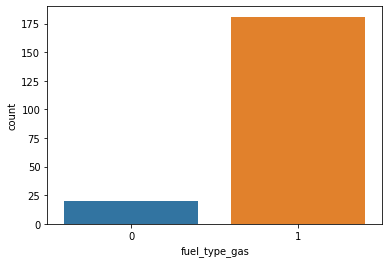

In [22]:
#Visualizing the shape of the data with respect to automobiles that use petrol vs diesel
sns.countplot(x=df2['fuel_type_gas'] , data=df2)

We can observe that the data contails less than 25 records of automobiles using diesel and rest using petrol. This shows the bias between the two and the demand for petrol vehicles.

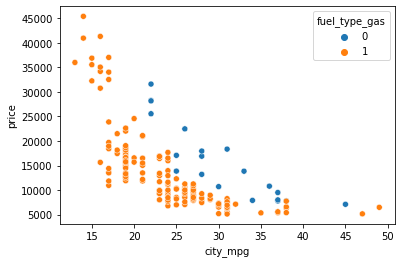

In [23]:
#Price vs citympg
sns.scatterplot(data=df2, x=df2.city_mpg, y=df2.price, hue=df2.fuel_type_gas)

We can notice that expensive car range uses petrol as fuel and provide lesser city miles per gallon, lower the price range, higher city miles per gallon for both diesel and petrol auto. As the data for diesel auto is very less, it is difficult to draw conclusion although it has the same variation as pertol vehicles 

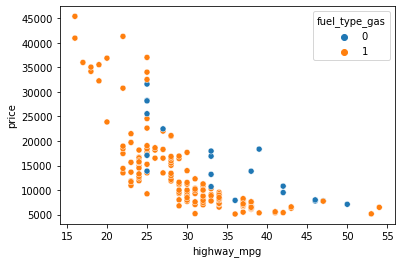

In [24]:
#Price vs highwaympg
sns.scatterplot(data=df2, x=df2.highway_mpg, y=df2.price, hue=df2.fuel_type_gas)

The plot is similar to that of price vs citympg

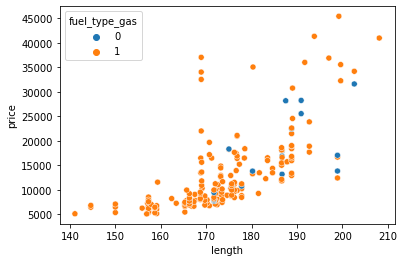

In [25]:
#price vs length
sns.scatterplot(data=df2, x=df2.length, y=df2.price, hue=df2.fuel_type_gas)

Auto ranging from 5000 to 20000 have length of auto ranging from 140 to 180, as price increases above20000, the auto have longer length, this could mean more comfortable and more of number of seats.

(array([44., 45., 46., 24., 14., 16.,  5.,  6.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <a list of 10 Patch objects>)

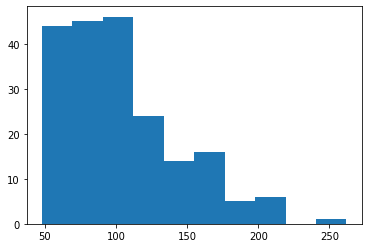

In [89]:
plt.hist(df2.horse_power)


(array([81., 45., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

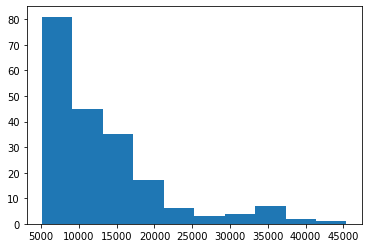

In [87]:
plt.hist(df2.price)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd59f80d350>,
      dtype=object)

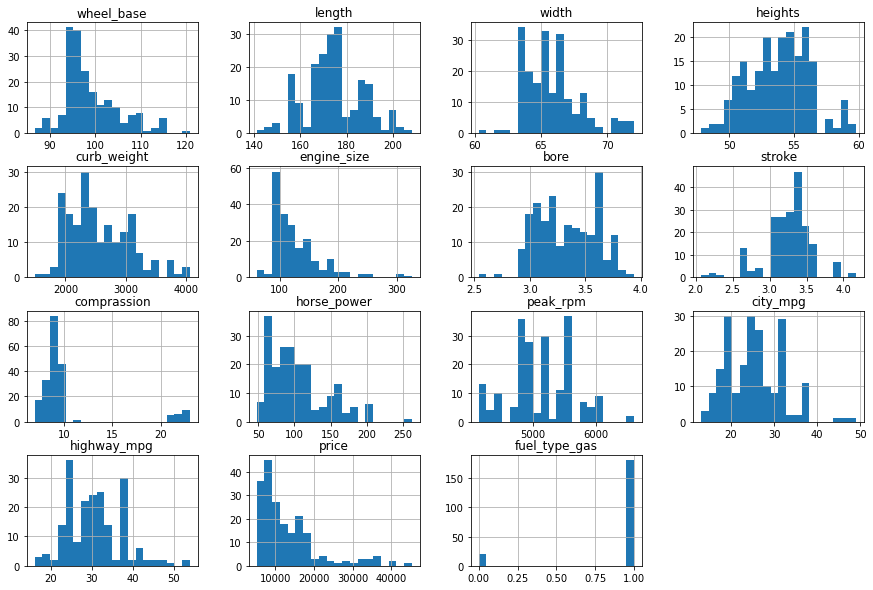

In [92]:
df2.hist(bins=20, figsize=(15, 10))

# Identify significant correlations

In [26]:
df2.corr(method='pearson')

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.499720,0.161682,0.250313,0.345997,-0.362731,-0.470606,-0.543304,0.584642,-0.307237
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.611615,0.126626,0.159733,0.569588,-0.275830,-0.665192,-0.698142,0.690628,-0.211187
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.541936,0.189210,0.189867,0.601264,-0.237576,-0.633531,-0.680635,0.751265,-0.244356
heights,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.210370,-0.049251,0.259737,-0.093819,-0.311934,-0.049800,-0.104812,0.135486,-0.281578
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.643767,0.169111,0.156433,0.728827,-0.276848,-0.749543,-0.794889,0.834415,-0.221046
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.591943,0.214419,0.028889,0.796320,-0.251424,-0.650546,-0.679571,0.872335,-0.070779
bore,0.499720,0.611615,0.541936,0.210370,0.643767,0.591943,1.000000,-0.048718,0.004778,0.552154,-0.287392,-0.552856,-0.565467,0.538993,-0.060124
stroke,0.161682,0.126626,0.189210,-0.049251,0.169111,0.214419,-0.048718,1.000000,0.188933,0.147628,-0.042193,-0.025173,-0.027081,0.082334,-0.243003
comprassion,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.004778,0.188933,1.000000,-0.216481,-0.435962,0.331425,0.268465,0.071107,-0.985231
horse_power,0.345997,0.569588,0.601264,-0.093819,0.728827,0.796320,0.552154,0.147628,-0.216481,1.000000,0.145386,-0.801598,-0.774382,0.768373,0.171754


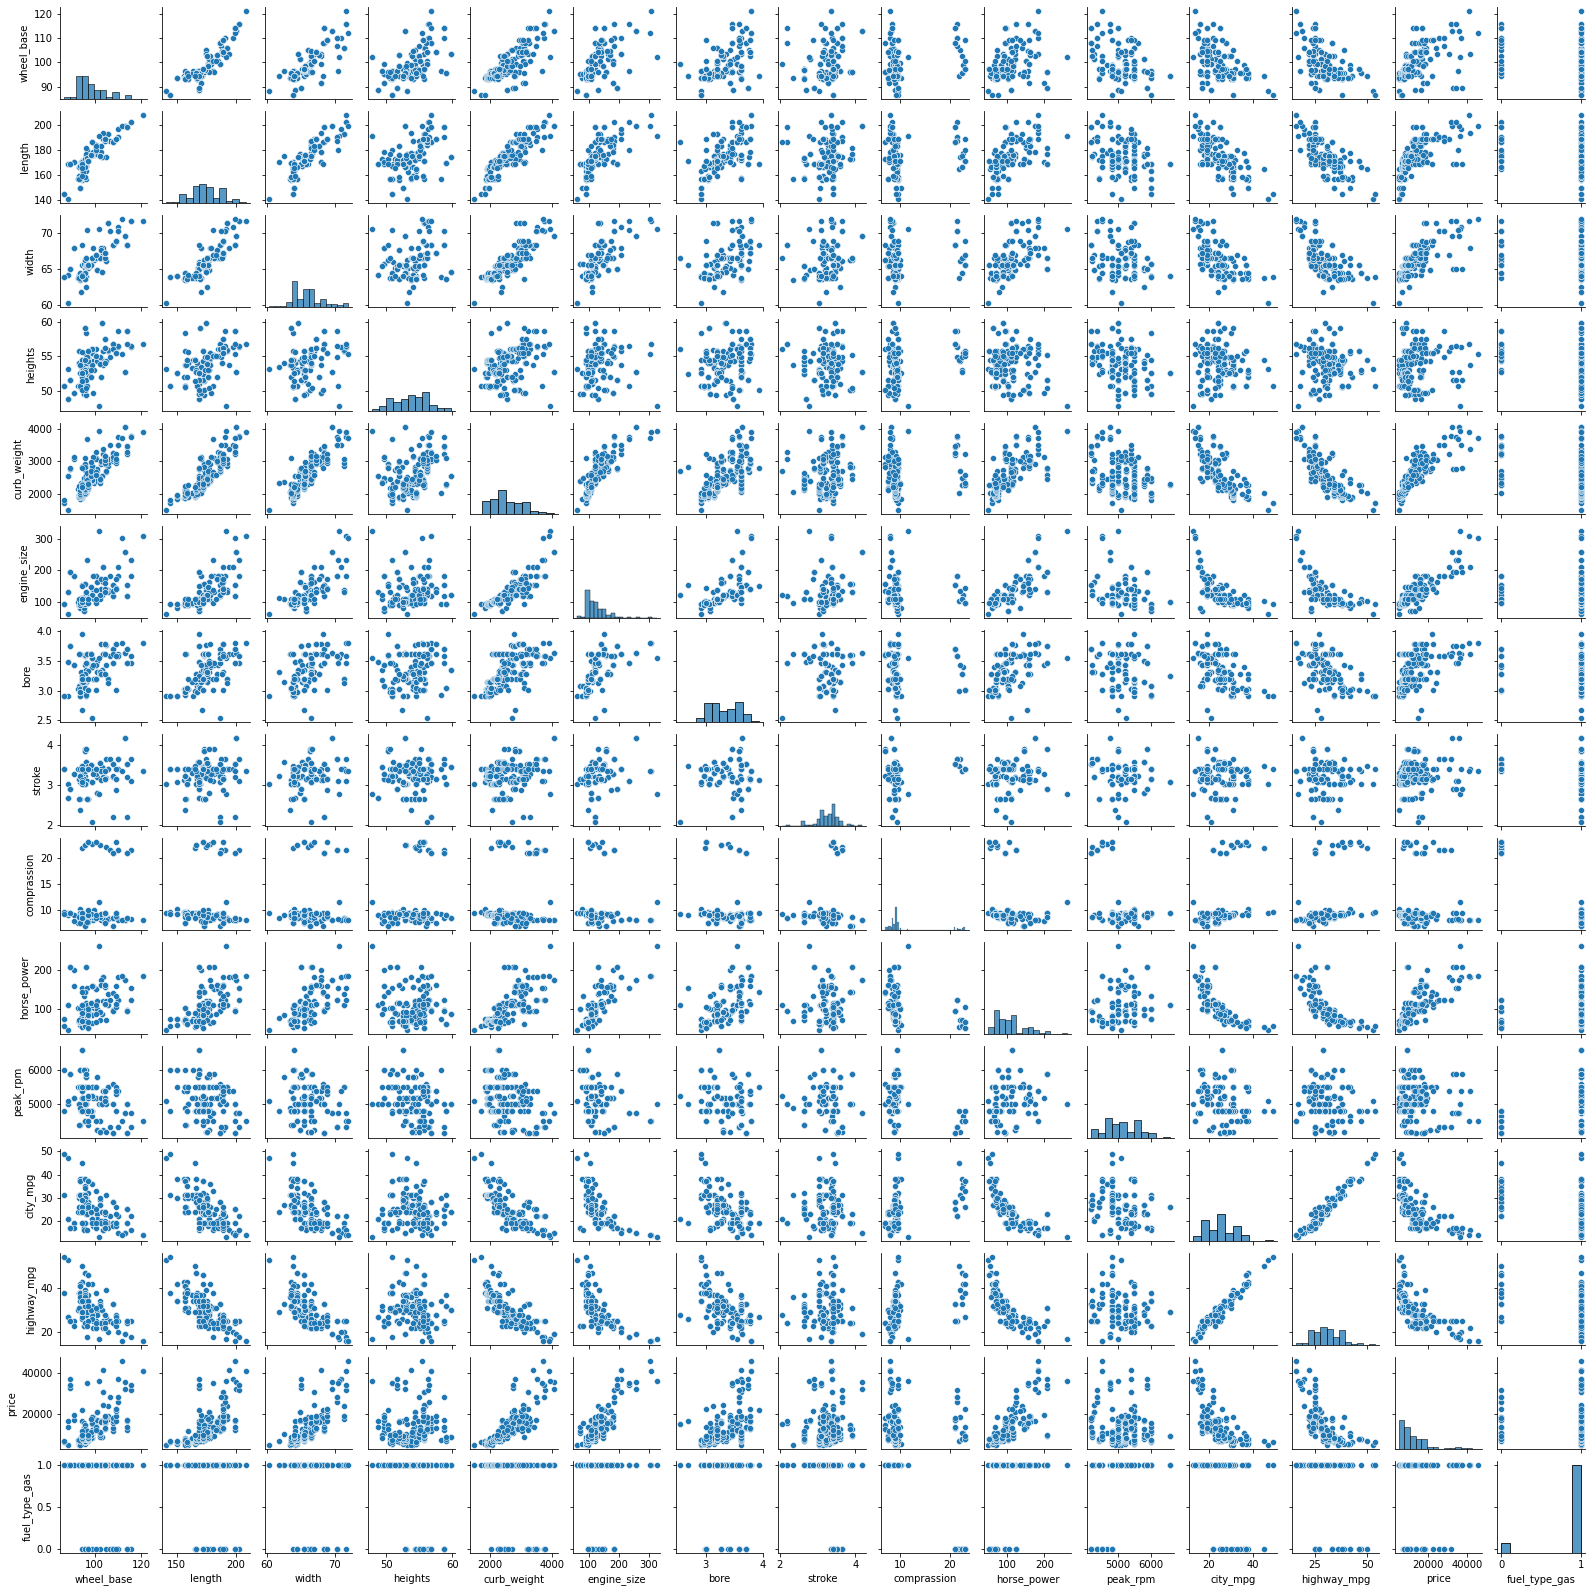

In [27]:
sns.pairplot(data=df2, height=1.5)

some of the petrol and diesel autos varaibles having strong correlations are: 

wheel- base vs length, width curb weight.

length vs curb_weight,city_mpg, highwaympg

width vs price, length, curb_weight

curb_weight vs highway and city mpg

cit_mpg vs highway_mpg, engine size

Some of the petrol and diesel autos variables having NO correlations:
comprassion vs all the attributes

# Spot or deal with outliers

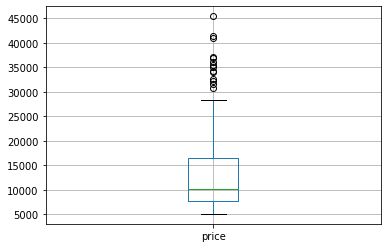

In [28]:
df2.boxplot(column=['price'])

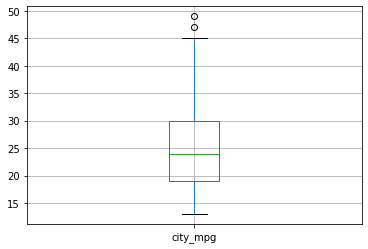

In [29]:
df2.boxplot(column=['city_mpg'])

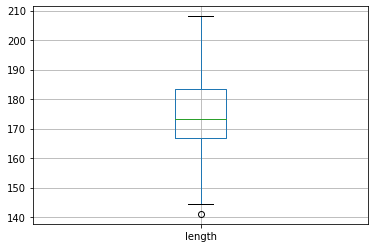

In [30]:
df2.boxplot(column=['length'])

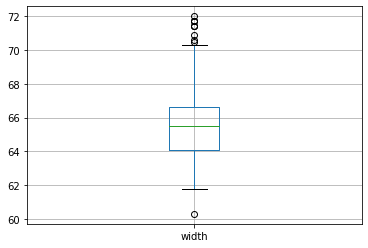

In [31]:
df2.boxplot(column=['width'])

We can observe outliers for each attribute but it is difficult to completely get rid of the outliers as the outliers value can be important in this case, we can observe that the price box plot has many outliers for higher end of values but these values cannot be excluded as these range could be effective for later analysis

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [32]:
#Manipulate data to fit regression analysis
#Independent variables : all except price
X= sm.add_constant(df2.drop(['price'],axis=1))
#Dependent variable price
y=df2['price'].values.reshape(-1,1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
##
model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     73.15
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           9.55e-68
Time:                        03:57:48   Log-Likelihood:                -1901.6
No. Observations:                 201   AIC:                             3833.
Df Residuals:                     186   BIC:                             3883.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.385e+04   1.87e+04     -1.814      0.071   -7.07e+04    2956.672
wheel_base       84.8492    105.228      0.806      0.421    -122.744     292.443
length         -101.1170     59.523     -1.699      0.091    -218.545      16.311
width           591.6150    262.270      2.256      0.025      74.209    1109.021
heights         169.1734    137.819      1.228      0.221    -102.717     441.064
curb_weight       2.1786      1.770      1.231      0.220      -1.313       5.670
engine_size     132.1719     14.884      8.880      0.000     102.809     161.534
bore          -1620.7975   1239.745     -1.307      0.193   -4066.566     824.971
stroke        -3995.2231    880.855     -4.536      0.000   -5732.974   -2257.472
comprassion    -216.6570    438.356     -0.494      0.622   -1081.445     648.131
horse_power      12.2614     16.019      0.765      0.445     -19.340      43.863
peak_rpm          2.6411      0.726      3.636      0.000       1.208       4.074
city_mpg       -430.1114    183.041     -2.350      0.020    -791.214     -69.009
highway_mpg     290.3236    168.493      1.723      0.087     -42.080     622.727
fuel_type_gas -7138.3023   5969.621     -1.196      0.233   -1.89e+04    4638.567
==============================================================================
Omnibus:                       22.502   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.985
Skew:                           0.396   Prob(JB):                     7.74e-15
Kurtosis:                       5.670   Cond. No.                     4.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     73.15
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           9.55e-68
Time:                        03:57:48   Log-Likelihood:                -1901.6
No. Observations:                 201   AIC:                             3833.
Df Residuals:                     186   BIC:                             3883.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.385e+04   1.87e+04     -1.814      0.071   -7.07e+04    2956.672
wheel_base       84.8492    105.228      0.806      0.421    -122.744     292.443
length         -101.1170     59.523     -1.699      0.091    -218.545      16.311
width           591.6150    262.270      2.256      0.025      74.209    1109.021
heights         169.1734    137.819      1.228      0.221    -102.717     441.064
curb_weight       2.1786      1.770      1.231      0.220      -1.313       5.670
engine_size     132.1719     14.884      8.880      0.000     102.809     161.534
bore          -1620.7975   1239.745     -1.307      0.193   -4066.566     824.971
stroke        -3995.2231    880.855     -4.536      0.000   -5732.974   -2257.472
comprassion    -216.6570    438.356     -0.494      0.622   -1081.445     648.131
horse_power      12.2614     16.019      0.765      0.445     -19.340      43.863
peak_rpm          2.6411      0.726      3.636      0.000       1.208       4.074
city_mpg       -430.1114    183.041     -2.350      0.020    -791.214     -69.009
highway_mpg     290.3236    168.493      1.723      0.087     -42.080     622.727
fuel_type_gas -7138.3023   5969.621     -1.196      0.233   -1.89e+04    4638.567
==============================================================================
Omnibus:                       22.502   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.985
Skew:                           0.396   Prob(JB):                     7.74e-15
Kurtosis:                       5.670   Cond. No.                     4.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#variance of the model
model1.mse_resid

10437676.179322787

1. How do you interpret the intercept?

Answer: The intercept is the average price when all the other variable values are 0 is a small negative number indicating if there are no specifications, the auto cannot be priced which is sure s fact.

2. How many variables are statistically significant?

Answer: With reference to Confidence intervals ( presence 0 makes it statistically not significant) variables that are statisctically significant  are:

1. engine_size

2. Width

3. Peak_rpm






3. What is the variance of the model?

Variance = 10437676.17932278


4. What is the coefficeint of determination and how do you interpret it?

The coefficient of determination or the R-squared is the value that interprets how well the model fits the data. In the above example, R-squared is 0.846 which indicates that 84.6% of variation in the price is caused by the independent variables.


5. What is the F-statistics used for? How do you interpret it for this model?

F-statistics  is used when deciding to reject or support the null hypothesis. F-stat along woth p-value can be used to determine if the overall result is significant, we can observe here that F-stat value is very high and p-value is < 0.05 indicating that the result is not significant.

**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow. 

Variables that are not statistically significant at least at 90% confidence level, from p-value ( p-value <= 0.10 are  stat significant) are:'wheel_base','heights','curb_weight', 'bore','comprassion', 'horse_power', 'fuel_type_gas'

In [36]:
df3 = df2.drop(columns=['wheel_base','heights','curb_weight', 'bore','comprassion', 'horse_power', 'fuel_type_gas'],axis=1)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   length       201 non-null    float64
 1   width        201 non-null    float64
 2   engine_size  201 non-null    int64  
 3   stroke       201 non-null    float64
 4   peak_rpm     201 non-null    float64
 5   city_mpg     201 non-null    int64  
 6   highway_mpg  201 non-null    int64  
 7   price        201 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 22.2 KB


In [38]:
#Manipulate data to fit regression analysis
#Independent variables : all except price
X= sm.add_constant(df3.drop(['price'],axis=1))
#Dependent variable price
y=df3['price'].values.reshape(-1,1)
model2 = sm.OLS(y, X).fit()
model2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     127.2
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           9.14e-69
Time:                        03:57:48   Log-Likelihood:                -1916.4
No. Observations:                 201   AIC:                             3849.
Df Residuals:                     193   BIC:                             3875.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.699e+04    1.4e+04     -4.798      0.000   -9.45e+04   -3.95e+04
length          5.1227     41.732      0.123      0.902     -77.187      87.432
width         950.2455    246.863      3.849      0.000     463.350    1437.141
engine_size   135.9078      9.684     14.034      0.000     116.807     155.008
stroke      -2878.9744    802.315     -3.588      0.000   -4461.406   -1296.543
peak_rpm        1.9049      0.602      3.164      0.002       0.718       3.092
city_mpg     -186.7526    168.859     -1.106      0.270    -519.798     146.293
highway_mpg   122.4137    163.679      0.748      0.455    -200.415     445.242
==============================================================================
Omnibus:                       27.991   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.699
Skew:                           0.665   Prob(JB):                     2.96e-13
Kurtosis:                       5.263   Cond. No.                     2.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model2.mse_resid

11662503.810663193

1. How do you interpret the intercept?

Answer: The intercept is the average price when all the other variable values are 0 is a small negative number (-66990) indicating if there are no specifications, the auto cannot be priced which is sure fact.

2. How many variables are statistically significant?

Answer: With reference to Confidence intervals ( presence 0 makes it statistically not significant) variables that are statisctically significant  are:

1. engine_size

2. Width

3. Peak_rpm




3. What is the variance of the model?

Variance = 11662503.810663193

4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 
The coefficient of determination or the R-squared is the value that interprets how well the model fits the data. In the above example, R-squared is 0.822 which indicates that 82.2% of variation in the price is caused by the independent variables present in model2 that are 'wheel_base','heights','curb_weight', 'bore','comprassion', 'horse_power', 'fuel_type_gas' and remaining 17.8% variation in price is caused by remanining attributes.

Adjusted-R squared is used for analysis of the model output for multiple regression when we have more than one independent variable like in our case, for model2 it is 81.2% whereas for model1 is 83.5%, we can observe that model1 fit can explain 83.5% variation in price but model2 with the significant variable can explain about 81.2% varaition in price, inidcating model2 is a better fit.


5. What is the F-statistics used for? How do you interpret it for this model?

F-statistics  is used when deciding to reject or support the null hypothesis. F-stat along woth p-value can be used to determine if the overall result is significant, we can observe here that F-stat value is very high and p-value is < 0.05 indicating that the result is not significant.

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?



null hypothesis H0 = the reduced model (model2) is better

alternative hypothesis H1 = the full model (model1) is better

In [40]:
anova_lm(model2,model1,type=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,193.0,2.250863e+09,0.0,NaN,NaN,NaN
1,186.0,1.941408e+09,7.0,3.094555e+08,4.235418,0.000232


The F-value is 4.235418 and p-value is close to 0,hence we can reject the null hypothesis that the reduced model is better.

**4.Checking the assumptions:**

-What are the assumptions?

Answer:

Linearity Assumption: The relationship between Y and Xj is linear for all predicting variables

Constant Variance Assumption: Var(ei) = s2

Independence Assumption: {e1,…, en} are independent random variables

Normality Assumption: ei ~ Normal

-Do they hold?

Let us test this!

# Linearity Assumption

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


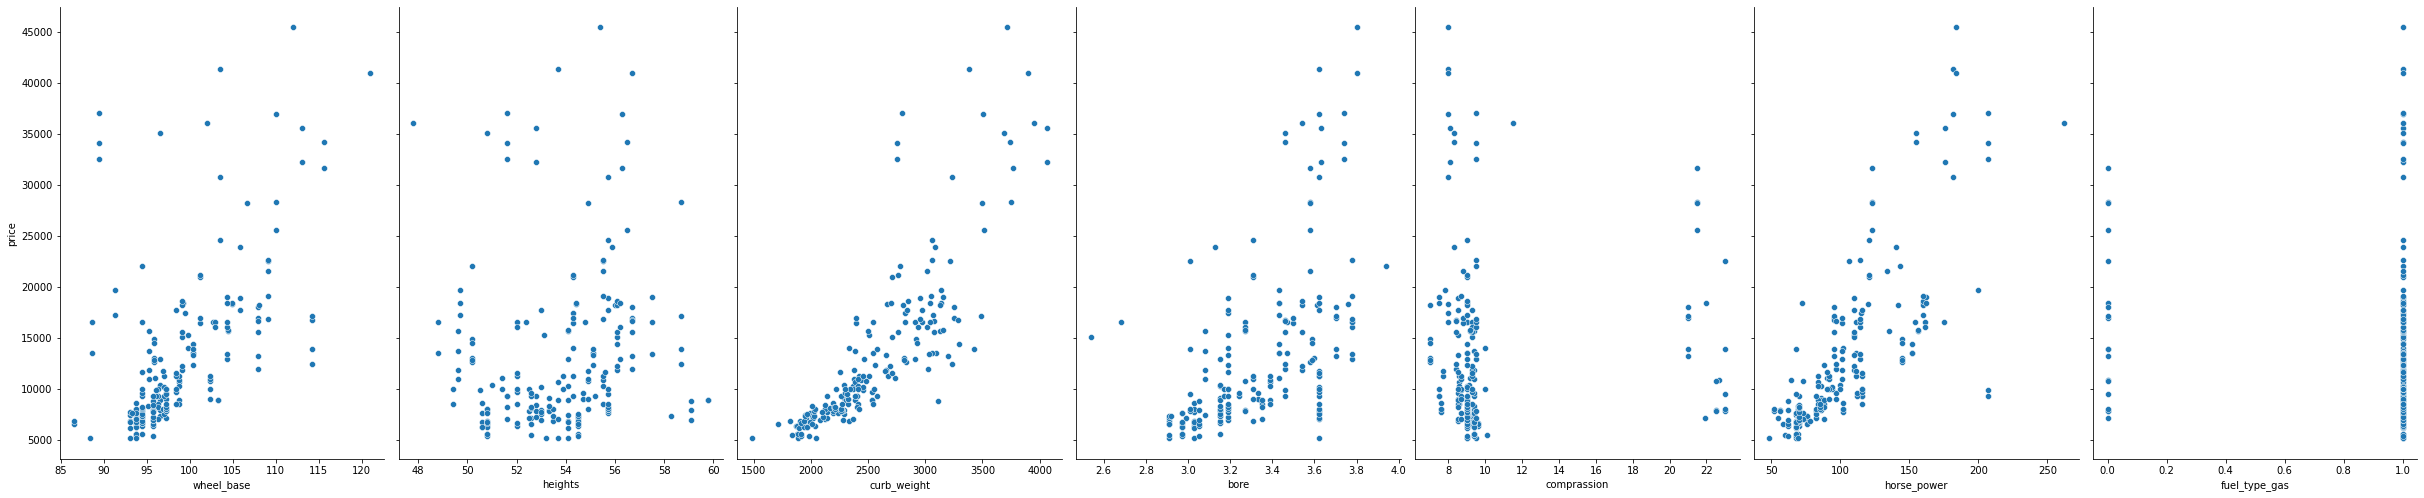

In [73]:
p = sns.pairplot(df2, x_vars=['wheel_base','heights','curb_weight', 'bore','comprassion', 'horse_power', 'fuel_type_gas'], y_vars='price', size=7, aspect=0.7)

The above plots for response variable price vs the independent variables show that the data is not fit for linear fit, though curb_weight and horse_power are somewhat better and show a slight straight line but overall the linearity assumption between the predictor and predicted variable is not linear and hence the assumption does not hold.

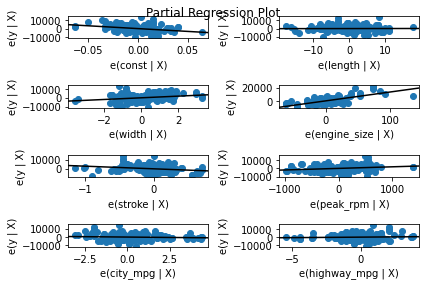

In [74]:
fig = sm.graphics.plot_partregress_grid(model2)
fig.tight_layout(pad=1.0)

# Assumption that the errors are independent
To test the assumption that the errors are independent, one can use the **Durbin-Watson test**
For this test, a value of 2, or close to it, is ideal. The statistical value ranges between 0-4 where a value closer to 0 is more evidence for positive serial correlation and a value closer to 4 is more evidence for negative serial correlation.


In [93]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels

statsmodels.stats.stattools.durbin_watson(model2.resid)

0.9372593876161671

The value obtained is close to 1 and serves as an evidence for positive correlation and the assumption holds true.

# **Assumption of normality**: the null hypothesis is that the errors are normally distributed

(array([ 3.,  3., 20., 56., 75., 24., 12.,  5.,  1.,  2.]),
 array([-10620.57587059,  -8143.46425065,  -5666.35263071,  -3189.24101077,
          -712.12939083,   1764.98222912,   4242.09384906,   6719.205469  ,
          9196.31708894,  11673.42870888,  14150.54032883]),
 <a list of 10 Patch objects>)

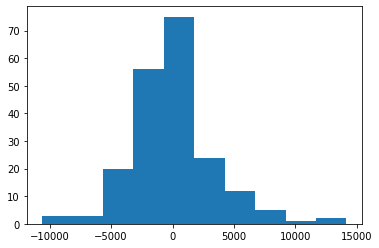

In [52]:
plt.hist(model2.resid)


The histogram of the data is not really symmetrical, is the data normal? Let us try to gain more insights statistically.

In [53]:
##your code goes here
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model2.resid)
# lzip(name, test)
print(f"JB statistic: {test[0]}")
print(f"p-value: {test[1]}")

JB statistic: 57.69938687769234
p-value: 2.9562239757086986e-13


From the above results, we can see that JB stats is high and p-value< 0 , we can reject the null hypothesis that the normality holds.

Text(0.5, 1.0, 'Model2 Residuals Q-Q Plot')

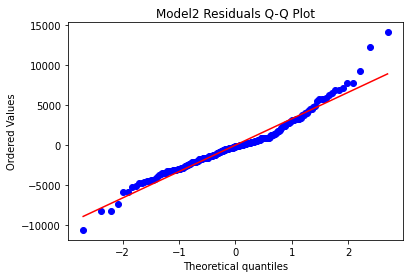

In [54]:
#Running plot & giving it a title
stats.probplot(model2.resid, dist="norm", plot= plt)
plt.title("Model2 Residuals Q-Q Plot")

The Q-Q plot  above shows depicts a partial straight line, the points are deviating away from straight line at the edges showing that model2 is not normal but close to being normal.





# Assumption of Constant Variance:Bruesch-Pagan test for homoscedasticity

In [56]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model2.resid, model2.model.exog)
lzip(name, test)


[('Lagrange multiplier statistic', 60.95686852775188),
 ('p-value', 9.720090926077477e-11),
 ('f-value', 12.001073732658751),
 ('f p-value', 1.1100814202169397e-12)]

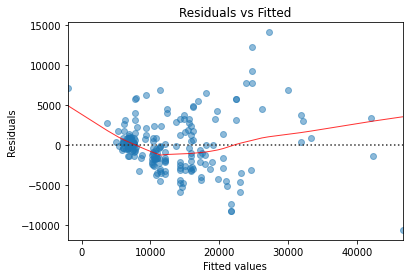

In [68]:
# fitted values
model_fitted_y = model2.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y=y, data=df2, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

From the plot it is evident that the variance is not uniformly distributed,hence we can reject the null hypothesis that the assumption constant variance holds.

# **5. Is there Multicollinearity in your data?**

In [77]:
max = 1/(1-0.822) #R-squared value for model2 = 0.822
max

5.617977528089886

In [75]:
#VIF factor = max(10,5.6) that is if VIF > 10 then there is multicollinearity in data
X_df=pd.DataFrame(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["Feature"] = X_df.columns

vif.round(2)

,VIF Factor,Feature
0,3359.29,const
1,4.53,length
2,4.62,width
3,2.78,engine_size
4,1.11,stroke
5,1.46,peak_rpm
6,20.17,city_mpg
7,21.34,highway_mpg


Yes, there exists multicollinearity in the data as two variables have VIF factor > 10.  The predictor variables city_mpg and highway_mpg are more correlated to each other than to target varaibles.

#Thank you!!